In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/books-dataset/Books.csv


In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set matplotlib backend for non-interactive environments
plt.switch_backend('Agg')

# Ensure inline plotting if needed (for environments that support it)
%matplotlib inline

# Set seaborn style
sns.set(style='whitegrid')

In [4]:
# Load the data
file_path = '/kaggle/input/books-dataset/Books.csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except FileNotFoundError:
    raise FileNotFoundError(f"The file {file_path} was not found. Check that the dataset is in the correct directory.")

# Display the first few rows of the DataFrame (for debugging purposes)
df.head()

,title,author,pages,genre,description,published_date,publisher,language,average_rating,ratings_count,thumbnail
0,Fictional Points of View,Peter Lamarque,252,Literary Criticism,The volume focuses on a wide range of thinkers...,1996,Cornell University Press,en,No rating,0,http://books.google.com/books/content?id=rh-om...
1,Science Fiction and Fantasy Literature,"R. Reginald, Douglas Menville, Mary A. Burgess",802,Reference,"Science Fiction and Fantasy Literature, A Chec...",2010-09-01,Wildside Press LLC,en,No rating,0,http://books.google.com/books/content?id=P8zW2...
2,Library of Congress Subject Headings,Library of Congress. Cataloging Policy and Sup...,1662,"Subject headings, Library of Congress",No description available,2004,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=pEhkh...
3,Library of Congress Subject Headings,Library of Congress,1512,"Subject headings, Library of Congress",No description available,2007,Unknown Publisher,en,No rating,0,http://books.google.com/books/content?id=FgAjF...
4,Fictional Space in the Modernist and Post-mode...,Carl Darryl Malmgren,248,Fiction,Fictional space is the imaginal expanse of fie...,1985,Bucknell University Press,en,No rating,0,http://books.google.com/books/content?id=KXzoz...


In [5]:
# Convert pages to numeric; sometimes pages may includes non-numeric values, so coerce errors
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')

# Convert average_rating to numeric (it is stored as string)
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

# Convert published_date from string to datetime. Inferred date format automatically if possible
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# Create a new column for published year, if the datetime conversion was successful
df['published_year'] = df['published_date'].dt.year

# Check data types after cleaning
df.dtypes

# Handling missing values could be an area for more in-depth cleaning
df = df.dropna(subset=['pages', 'average_rating', 'ratings_count', 'published_year'])

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

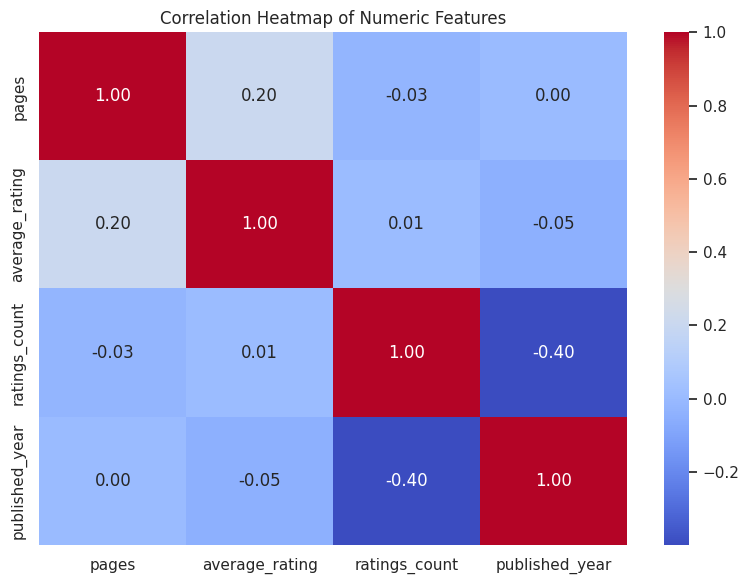

In [6]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.show()
else:
    print("Not enough numeric features to create a correlation heatmap.")

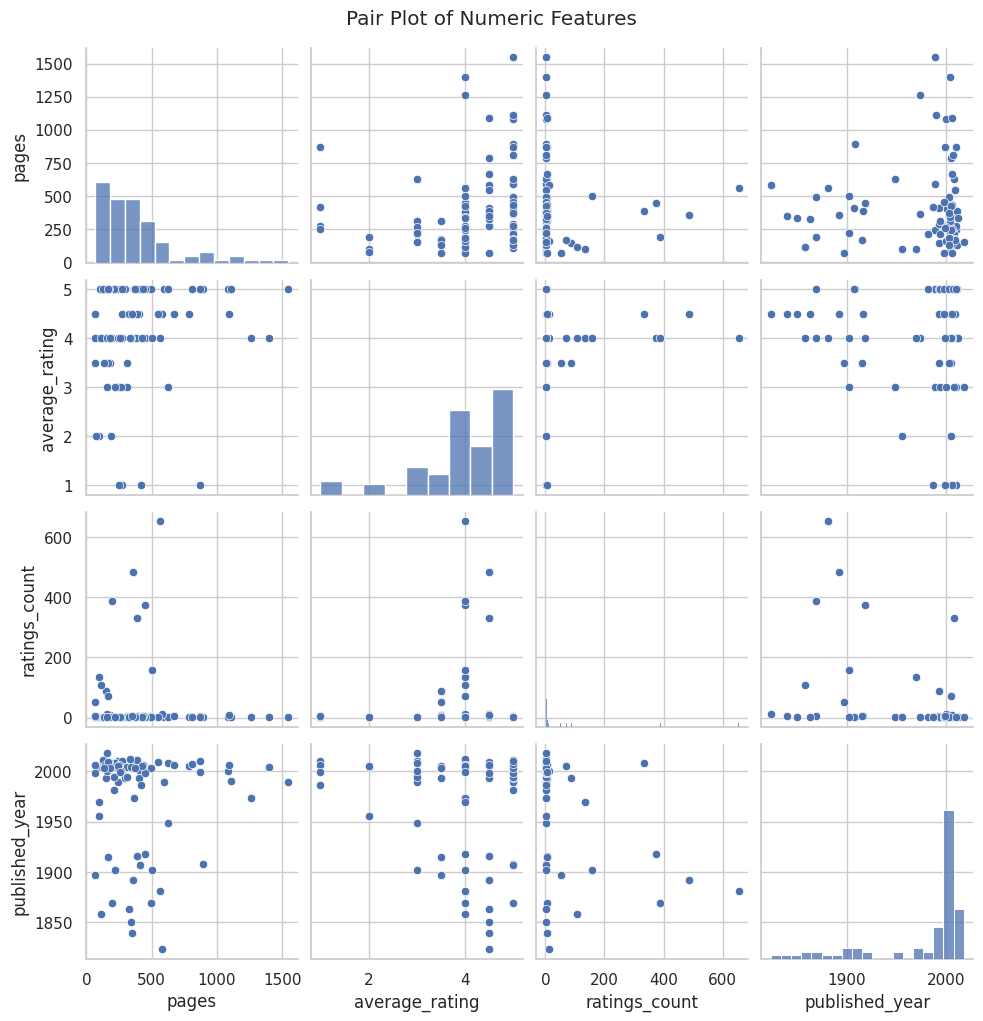

In [7]:
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.savefig('pair_plot.png')
plt.show()

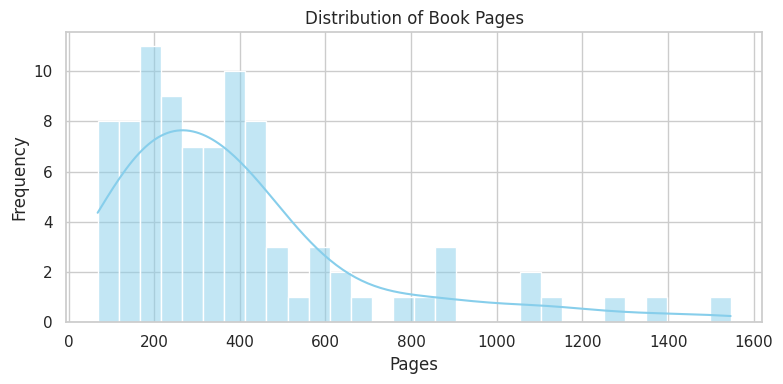

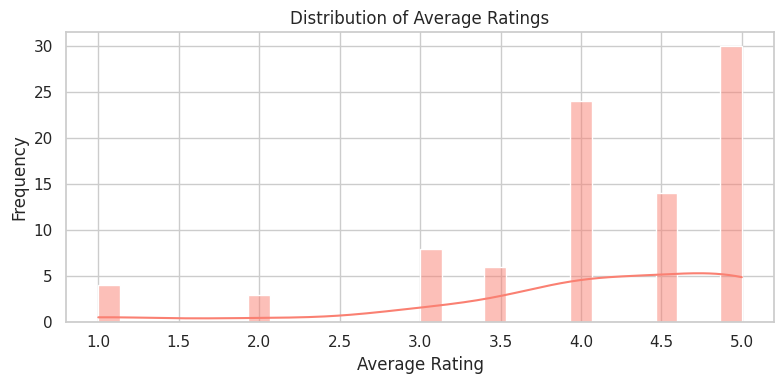

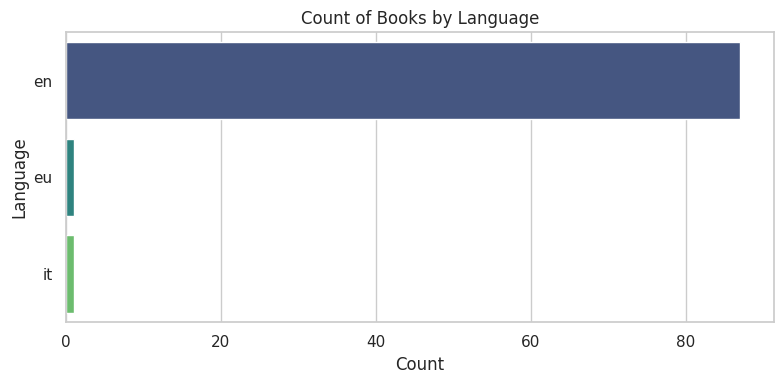

In [8]:
# Histogram for pages
plt.figure(figsize=(8, 4))
sns.histplot(df['pages'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Book Pages')
plt.xlabel('Pages')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('pages_histogram.png')
plt.show()

# Histogram for average_rating
plt.figure(figsize=(8, 4))
sns.histplot(df['average_rating'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('rating_histogram.png')
plt.show()

# Count plot for language (Pie charts are not the best practice in data visualization so we use countplot)
plt.figure(figsize=(8, 4))
sns.countplot(y='language', data=df, order=df['language'].value_counts().index, palette='viridis')
plt.title('Count of Books by Language')
plt.xlabel('Count')
plt.ylabel('Language')
plt.tight_layout()
plt.savefig('language_countplot.png')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features and target
features = ['pages', 'ratings_count', 'published_year']
target = 'average_rating'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate prediction accuracy (R² score)
accuracy = r2_score(y_test, y_pred)
print(f"R² Score for the Linear Regression model: {accuracy:.2f}")

R² Score for the Linear Regression model: -1.41
